In [1]:
import datetime
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
%matplotlib inline

In [90]:
def reg(n,t,a):
    rs = []
    tv = []
    ntv = 0
    
    for i in range(n):
        x = [np.random.normal()]
        y = [np.random.normal()]

        for j in range(1,t):
            x.append(x[j-1]+np.random.normal())
            y.append(y[j-1]+np.random.normal())
            
        data = pd.DataFrame({'x':x,'y':y})
        model = ols("y~x",data).fit()
        
        rs.append(model.rsquared)
        tv.append(model.tvalues.x)
        
        if abs(tv[i]) > a:
            ntv = ntv+1
        
    r05 = np.percentile(rs,5)
    r50 = np.percentile(rs,50)
    r95 = np.percentile(rs,95)
    t05 = np.percentile(tv,5)
    t50 = np.percentile(tv,50)
    t95 = np.percentile(tv,95)
        
    np.sort(rs)
    plt.subplot(211)
    plt.hist(rs,100)
    plt.title('Histogram of R-Squared')
    plt.xlabel('R-Squared')
    plt.ylabel('Times')

    np.sort(tv)
    plt.subplot(212)
    plt.hist(tv,100)
    plt.title('Histogram of t-Statistics')
    plt.xlabel('t-Statistics')
    plt.ylabel('Times')
        
    print ('次數:',n)
    print ('長度:',t)
    print ('R-square     5% percentile:', '%9.5f' % r05)
    print ('R-square    50% percentile:', '%9.5f' % r50)
    print ('R-square    95% percentile:', '%9.5f' % r95)
    print ('t-statistic  5% percentile:', '%9.5f' % t05)
    print ('t-statistic 50% percentile:', '%9.5f' % t50)
    print ('t-statistic 95% percentile:', '%9.5f' % t95)
    print ('t-value > 1.96 次數：', ntv)
    p = ntv / n * 100
    print ('拒絕H0的百分比', '%.1f%%' % p)
               

次數: 1000
長度: 100
R-square     5% percentile:   0.00152
R-square    50% percentile:   0.16649
R-square    95% percentile:   0.69586
t-statistic  5% percentile: -12.14443
t-statistic 50% percentile:   0.17704
t-statistic 95% percentile:  11.85282
t-value > 1.96 次數： 736
拒絕H0的百分比 73.6%


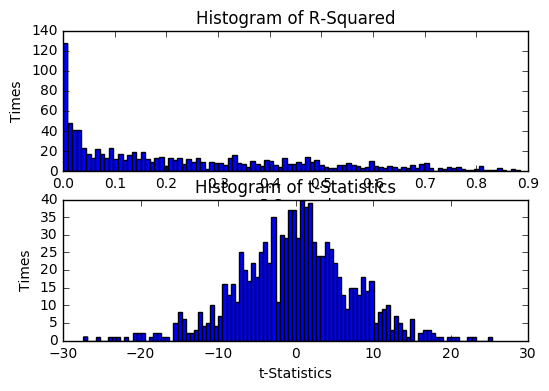

In [91]:
reg(1000,100,1.96)